As I think about how to do the neighbor search in JAX, I should set up some code to test different things. First, we want to randomly initialize some data in 2D (easier to plot). The number of particles and their smoothing radius will be fixed, but their positions and the overall size of the domain should be randomly chosen. A good algorithm should be able to handle changing domain sizes.

In [52]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

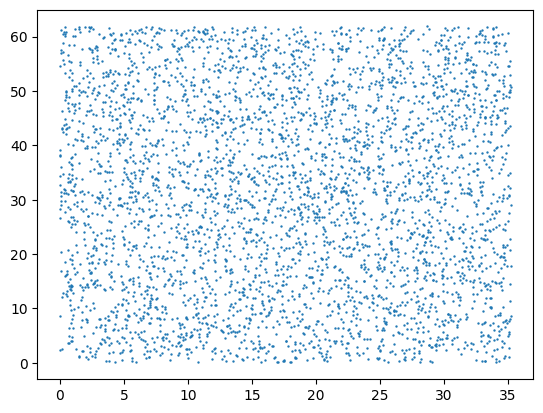

In [53]:
seed = 4
key = jax.random.key(seed)
limits = jax.random.uniform(key,(2,),minval=1,maxval=100)
N = 4096
x = jax.random.uniform(key,(N,2),minval=jnp.array([0,0]),maxval=limits)
plt.scatter(x[:,0],x[:,1],s=0.5)

Brute force is the worst case $O(N^2)$ so we should try that first as a benchmark. First we compute all the distances, then we sort them. In the end, we have an $N \times N$ size array, where each column is a list of particles (including itself) sorted by distance.

In [54]:
@jax.jit
def dist_ind(x):
    distances = jnp.sqrt(jnp.sum(jnp.square(x[:,None] - x[None,:]),-1))
    indices = jnp.argsort(distances,axis=-1)
    return distances, indices

In [55]:
demo = dist_ind(x)
%timeit dist_ind(x)

4.23 s ± 176 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


I tried a few different values of N and recorded the results here.

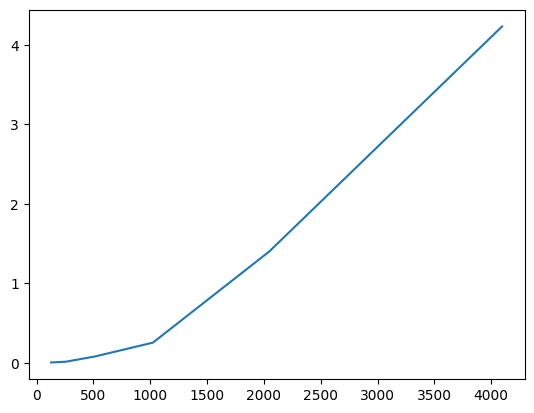

In [57]:
N_brute = [128, 256, 512, 1024, 2048, 4096]
t_brute = [0.00311, 0.0125, 0.0781, 0.253, 1.4, 4.23]
plt.plot(N_brute,t_brute)

This trend is quadratic, as we expect. This timing, combined with 